In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import date

# Fomatação do Pandas
pd.options.display.float_format='{:.2f}'.format

# Ignorando erros
import warnings
warnings.filterwarnings("ignore")

In [29]:
def limpa_dados_meses(url_data, url_scrapper, meses):
# Primeira Parte: Buscando os dados do banco de dados do github do módulo 1
    df = pd.read_csv(url_data, encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=12,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')

#Quantidade de meses passados que queremos analisar
    col = [df.columns[0]]
    for i in range(meses):
        col.append(df.columns[-(i+2)])

    # Pegando os valores da primeira coluna do dataframe original e os valores da penultima coluna, pois sabemos que a última se trata da soma total para o estado
    gastos_recentes = df[col]
    gastos_recentes[gastos_recentes.columns[0]] = gastos_recentes[gastos_recentes.columns[0]].str[3:]
    # Organizando de forma decrescente tendo como referência a última coluna do dataframe
    gastos_recentes = gastos_recentes.sort_values(by=gastos_recentes.keys()[1], ascending= False)

    # Ordenando de forma decrescente os Estados
    gastos_recentes = gastos_recentes.set_index(gastos_recentes.columns[0])


# Segunda Parte: Partindo agora para a segunda parte que é pegar os dados da Wikipedia
    tables = pd.read_html(url_scrapper, match ='População')
    populacao = pd.DataFrame(tables[0])
    populacao = populacao.drop([populacao.keys()[0],populacao.keys()[-2],populacao.keys()[-1]], axis = 1)
    populacao['População'] = populacao['População'].str.replace(" ", "").astype(int)
    populacao = populacao.set_index(populacao.keys()[0])
    populacao.index.names = ['UF']

# Retornando o dataset do Wikipedia e também o dataset com a coluna dos gastos mais recentes
    return populacao, populacao.join(gastos_recentes)

In [30]:
url_data = "https://raw.githubusercontent.com/dragoc1/Bootcamp_Data_Science_Aplicada/main/Modulo01/dados/A170937189_28_143_208.csv"

df = pd.read_csv(url_data, encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=12,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')
df = df.set_index(df['Unidade da Federação'].str[3:])
df = df.drop(columns = ['Unidade da Federação','Total'])

In [31]:
mensal = df.T
mensal['São Paulo'] = mensal['São Paulo'].astype(float)/1e6
mensal['Espírito Santo'] = mensal['Espírito Santo'].astype(float)/1e6
mensal.tail()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2020/Nov,9357946.29,3276590.1,19895617.91,3621031.05,39004315.8,2218532.26,527840.46,31942670.33,18911604.5,56916499.66,...,32.03,86776500.97,335.08,126859051.02,68460616.55,108853890.98,22023126.25,20506039.58,43037600.45,20459325.27
2020/Dez,8880836.55,3696997.31,17765167.69,3454460.94,38015145.79,2566919.6,675277.05,30783403.58,20883972.79,50849353.22,...,33.67,90416725.95,330.49,120037066.76,70333079.37,111760506.8,19629591.55,19583803.46,44147353.21,22991567.76
2021/Jan,9266014.59,3715723.12,21430289.17,3266928.47,38354682.46,2802886.34,419553.49,30738750.31,22689390.32,52078218.88,...,39.64,94179674.42,355.15,122122779.12,71970474.56,119992419.94,21693311.15,19120141.68,46127763.88,23527050.29
2021/Fev,7730597.04,3538427.92,25917134.55,3519773.73,37688314.23,2817849.31,319160.87,30924484.99,19400269.01,53171253.41,...,40.24,85583557.95,348.83,132622112.72,74337524.03,111797400.7,24337295.63,18349376.92,42742773.93,22766952.62
2021/Mar,11023309.47,4077045.92,22032176.22,3985530.08,33276392.89,3188210.98,1357751.33,39663677.48,20018325.75,62079618.54,...,45.49,106837295.81,392.95,140264608.52,81376630.57,130155185.16,25168195.34,19611032.61,45592686.49,31831917.45


In [32]:
meses = {
    "Jan":1,
    "Fev":2,
    "Mar":3,
    "Abr":4,
    "Mai":5,
    "Jun":6,
    "Jul":7,
    "Ago":8,
    "Set":9,
    "Out":10,
    "Nov":11,
    "Dez":12
}


def convert_date(ano_mes):
    ano = int(ano_mes[:4])
    mes = ano_mes[5:]
    mes_numero = int(meses[mes])
    return date(ano,mes_numero,1)

# Map: aplica a função em todas as linhas do index
mensal.index = mensal.index.map(convert_date)
mensal.index.name = "Data"

In [37]:
mensal.head()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Data,,,,,,,,,,,,,,,,,,,,,
2008-01-01,1388528.39,902416.0,4735529.42,657889.53,18864744.11,1120973.34,3441592.69,10723506.39,7985142.43,15539821.9,...,5.46,23025258.52,91.68,38266347.46,16504913.45,30931325.46,5377392.11,4795299.01,15310637.29,4745919.19
2008-02-01,2931283.42,1497206.26,7118990.57,777939.31,19553758.2,1268740.33,4985688.85,13559679.41,10079928.25,25735101.55,...,9.10,28394310.93,148.68,55384670.52,25651429.11,57363420.01,7002472.61,8684882.23,22258668.68,7632480.67
2008-03-01,1541682.52,1794028.48,8196635.49,718688.03,21937342.7,974651.24,6205612.6,13985142.36,10298372.45,28724625.75,...,10.25,44567062.94,156.09,53801318.85,26743524.89,51547794.07,8423933.19,7886243.14,21442515.75,9647203.26
2008-04-01,1525314.96,1730469.42,8259378.42,839994.39,20842829.69,1141137.32,4984482.09,14809416.46,10775976.33,30676457.06,...,11.25,44054604.82,161.23,52460306.69,27181488.26,56673338.49,8797487.68,8794109.79,20921212.45,11098732.99
2008-05-01,1645953.84,1819443.92,7831399.9,862347.96,23249952.88,866346.18,5511002.46,14505727.38,10398360.88,30604453.47,...,10.20,44911021.15,187.12,54419620.71,26845308.18,48397733.07,9770421.8,9231645.4,21615970.67,12891719.72


<AxesSubplot:xlabel='Data', ylabel='São Paulo'>

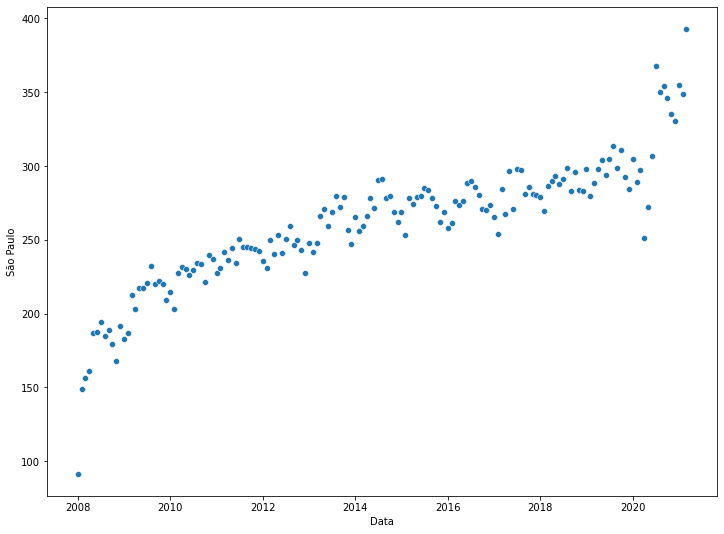

In [34]:
# Input's necessários para o plot
data = mensal
x = mensal.index
y = 'São Paulo'

# Criação da figura 
fig, ax = plt.subplots(figsize = (12,9))
sns.scatterplot(data = data, x = x, y = y)